In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

### Read data + Preprocessing

In [3]:
df_raw = pd.read_csv('data/twitter_data.csv')
df = df_raw[:10000]

In [125]:
df.loc[0:5,'content']

0    @tiffanylue i know  i was listenin to bad habi...
1    Layin n bed with a headache  ughhhh...waitin o...
2                  Funeral ceremony...gloomy friday...
3                 wants to hang out with friends SOON!
4    @dannycastillo We want to trade with someone w...
5    Re-pinging @ghostridah14: why didn't you go to...
Name: content, dtype: object

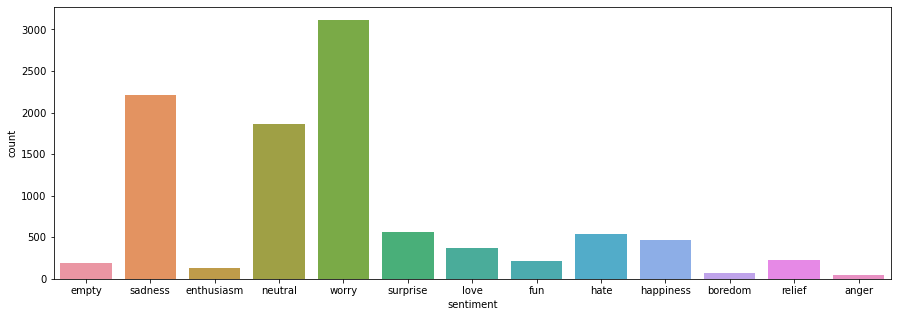

In [135]:
plt.figure(figsize=(15, 5))
sns.countplot(x=df['sentiment'])
plt.show()

In [139]:
df['sentiment'].value_counts()

worry         3115
sadness       2216
neutral       1857
surprise       562
hate           535
happiness      469
love           369
relief         227
fun            211
empty          194
enthusiasm     132
boredom         69
anger           44
Name: sentiment, dtype: int64

In [137]:
df['sentiment'].value_counts(normalize=True)

worry         0.3115
sadness       0.2216
neutral       0.1857
surprise      0.0562
hate          0.0535
happiness     0.0469
love          0.0369
relief        0.0227
fun           0.0211
empty         0.0194
enthusiasm    0.0132
boredom       0.0069
anger         0.0044
Name: sentiment, dtype: float64

In [4]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
Y = encoder.fit_transform(df['sentiment'])

In [5]:
dict_, i = {}, 0
for feeling in encoder.classes_:
    dict_[feeling] = i
    i += 1
dict_

{'anger': 0,
 'boredom': 1,
 'empty': 2,
 'enthusiasm': 3,
 'fun': 4,
 'happiness': 5,
 'hate': 6,
 'love': 7,
 'neutral': 8,
 'relief': 9,
 'sadness': 10,
 'surprise': 11,
 'worry': 12}

In [6]:
processed_text = df['content'].copy()

# Write "username" instead of the twitter username
#processed_text = processed_text.str.replace(r'(^|[^@\w])@(\w{1,15})\b', 'username', regex=True)
processed_text = processed_text.str.replace(r'(^|[^@\w])@(\w{1,15})\b', '', regex=True)

# Replace email addresses with 'emailaddress'
processed_text = processed_text.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress', regex=True)

# Replace URLs with 'webaddress'
processed_text = processed_text.str.replace(r'http\S+', 'webaddress', regex=True)

# Remove punctuation
processed_text = processed_text.str.replace(r'[^\w\d\s]', ' ', regex=True)

# Replace numbers with 'numbr'
processed_text = processed_text.str.replace(r'\d+(\.\d+)?', 'numbr', regex=True)

# Replace whitespace between terms with a single space
processed_text = processed_text.str.replace(r'\s+', ' ', regex=True)

# Remove leading and trailing whitespace
processed_text = processed_text.str.replace(r'^\s+|\s+?$', '', regex=True)

#All words to lowercase
processed_text = processed_text.str.lower()

# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
#processed_text = processed_text.str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumbr', regex=True)

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
#processed_text = processed_text.str.replace(r'£|\$', 'moneysymb', regex=True)

In [7]:
from nltk.corpus import stopwords
nltk.download('stopwords')

# remove stop words from text messages
stop_words = set(stopwords.words('english'))

processed_text = processed_text.apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alexx\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# Remove word stems using a Porter stemmer
ps = nltk.PorterStemmer()

processed_text = processed_text.apply(lambda x: ' '.join(ps.stem(term) for term in x.split()))

In [9]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# create bag-of-words
all_words = []

for message in processed_text:
    words = word_tokenize(message)
    for w in words:
        all_words.append(w)
        
all_words = nltk.FreqDist(all_words)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alexx\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
# print the total number of words and the 15 most common words
print('Number of words: {}'.format(len(all_words)))
print('Most common words: {}'.format(all_words.most_common(15)))

Number of words: 10210
Most common words: [('numbr', 1593), ('go', 1012), ('work', 876), ('get', 854), ('day', 642), ('like', 566), ('miss', 562), ('got', 548), ('want', 505), ('today', 504), ('feel', 458), ('time', 418), ('one', 404), ('back', 395), ('realli', 386)]


In [111]:
word_features = [word[0] for word in all_words.most_common(50)]

### Create dataset (df)

In [122]:
features_size = 50
word_features = [word[0] for word in all_words.most_common(features_size)]
processed_df = pd.DataFrame(columns=word_features)

for tweet in processed_text:
    input_ = np.zeros(features_size)
    for word in word_features:
        if word in word_tokenize(tweet):
            input_[word_features.index(word)] = 1
    
    processed_df.loc[len(processed_df.index)] = input_ 

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(processed_df, Y, test_size=0.33, random_state=42)

In [116]:
X_train.head(5)

,numbr,go,work,get,day,like,miss,got,want,today,...,sorri,come,look,well,week,hope,new,wait,tri,tonight
8371,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5027,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3944,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6862,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Model (df)

In [117]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [118]:
print(y_test)
print(y_pred)

[ 8 10 10 ... 12 11  6]
[12 12 10 ... 12 12 12]


In [144]:
y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
confusion_matrix(y_true, y_pred, labels=["ant", "bird", "cat"])


array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [141]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred, labels = ['1', '2', '3'])
print('Confusion Matrix\n')
print(confusion)

C:\Users\alexx\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:312: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif np.all([l not in y_true for l in labels]):


ValueError: At least one label specified must be in y_true

In [109]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, 
                            target_names=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9', 'Class 10', 'Class 11', 'Class 12', 'Class 13']))


Accuracy: 0.32

Micro Precision: 0.32
Micro Recall: 0.32
Micro F1-score: 0.32

Macro Precision: 0.06
Macro Recall: 0.08
Macro F1-score: 0.05

Weighted Precision: 0.20
Weighted Recall: 0.32
Weighted F1-score: 0.20

Classification Report

              precision    recall  f1-score   support

     Class 1       0.00      0.00      0.00        16
     Class 2       0.00      0.00      0.00        30
     Class 3       0.00      0.00      0.00        64
     Class 4       0.00      0.00      0.00        53
     Class 5       0.00      0.00      0.00        78
     Class 6       0.00      0.00      0.00       138
     Class 7       0.00      0.00      0.00       185
     Class 8       0.00      0.00      0.00       127
     Class 9       0.19      0.02      0.03       587
    Class 10       0.00      0.00      0.00        70
    Class 11       0.30      0.16      0.21       734
    Class 12       0.00      0.00      0.00       180
    Class 13       0.32      0.88      0.47      1038

    

C:\Users\alexx\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alexx\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alexx\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alexx\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:124

### Create dataset (dict)

In [12]:
# The find_features function will determine which of the 1500 word features are contained in the review
def find_features(message):
    words = word_tokenize(message)
    features = {}
    for word in word_features:
        features[word] = (word in words)

    return features

In [13]:
# Now lets do it for all the messages
messages = zip(processed_text, Y)

# define a seed for reproducibility
seed = 101
np.random.seed = seed
try:
    np.random.shuffle(messages)
except: 
    pass

# call find_features function for each SMS message
featuresets = [(find_features(text), label) for (text, label) in messages]

### Model (dict)

In [14]:
# we can split the featuresets into training and testing datasets using sklearn
from sklearn import model_selection

# split the data into training and testing datasets
training, testing = model_selection.train_test_split(featuresets, test_size = 0.25, random_state=seed)
print(len(training))
print(len(testing))

7500
2500


In [27]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import SVC

model = SklearnClassifier(SVC(kernel = 'linear'))

# train the model on the training data
model.train(training)

# and test on the testing dataset!
accuracy = nltk.classify.accuracy(model, testing)*100
print("SVC Accuracy: {}".format(accuracy))

SVC Accuracy: 30.919999999999998


In [25]:
# make class label prediction for testing set
txt_features, labels = zip(*testing)

prediction = nltk_ensemble.classify_many(txt_features)

# print a confusion matrix and a classification report
print(classification_report(labels, prediction))

pd.DataFrame(
    confusion_matrix(labels, prediction),
    index = [['actual', 'actual'], ['ham', 'spam']],
    columns = [['predicted', 'predicted'], ['ham', 'spam']])

AttributeError: 'VotingClassifier' object has no attribute 'estimators_'

### Proposals

* Removing username completely
* Varying number of the most common words as features